Traffic Sign Recognition Description + BONUS

In [ ]:

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"


In [ ]:
DATA_ROOT = "Data"
TRAIN_DIR = os.path.join(DATA_ROOT, "Train")
TEST_DIR = os.path.join(DATA_ROOT, "Test")

if not os.path.isdir(TRAIN_DIR):
    raise RuntimeError(f"Train folder not found at {TRAIN_DIR}")
if not os.path.isdir(TEST_DIR):
    print(f"Warning: Test folder not found at {TEST_DIR}, only training will be done")

print("Training folder:", TRAIN_DIR)


Training folder: Data\Train


In [ ]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 64
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", num_classes, class_names[:10])

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)


Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.
Classes: 43 ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17']


In [ ]:
norm = layers.Rescaling(1./255)
aug = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])


In [7]:
def build_simple_cnn(input_shape, n_classes):
    inputs = keras.Input(shape=input_shape)
    x = norm(inputs)
    x = aug(x)
    x = layers.Conv2D(32, 3, activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

simple_cnn = build_simple_cnn(IMG_SIZE + (3,), num_classes)
history = simple_cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    verbose=1
)


Epoch 1/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 468s 704ms/step - accuracy: 0.3430 - loss: 2.3892 - val_accuracy: 0.8322 - val_loss: 0.5254
Epoch 2/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 256s 520ms/step - accuracy: 0.7626 - loss: 0.7425 - val_accuracy: 0.9250 - val_loss: 0.2533
Epoch 3/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 277s 564ms/step - accuracy: 0.8588 - loss: 0.4393 - val_accuracy: 0.9556 - val_loss: 0.1476
Epoch 4/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 249s 507ms/step - accuracy: 0.8908 - loss: 0.3352 - val_accuracy: 0.9707 - val_loss: 0.1043
Epoch 5/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 271s 551ms/step - accuracy: 0.9094 - loss: 0.2855 - val_accuracy: 0.9754 - val_loss: 0.0980


In [8]:
def build_simple_cnn(input_shape, n_classes):
    inputs = keras.Input(shape=input_shape)
    x = norm(inputs)
    x = aug(x)
    x = layers.Conv2D(32, 3, activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

simple_cnn = build_simple_cnn(IMG_SIZE + (3,), num_classes)
history = simple_cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    verbose=1
)


Epoch 1/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 239s 479ms/step - accuracy: 0.2973 - loss: 2.5710 - val_accuracy: 0.7569 - val_loss: 0.7898
Epoch 2/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 253s 516ms/step - accuracy: 0.6990 - loss: 0.9288 - val_accuracy: 0.9078 - val_loss: 0.3453
Epoch 3/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 256s 521ms/step - accuracy: 0.8081 - loss: 0.5940 - val_accuracy: 0.9314 - val_loss: 0.2368
Epoch 4/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 246s 501ms/step - accuracy: 0.8455 - loss: 0.4774 - val_accuracy: 0.9443 - val_loss: 0.1872
Epoch 5/5
491/491 ━━━━━━━━━━━━━━━━━━━━ 233s 475ms/step - accuracy: 0.8669 - loss: 0.3945 - val_accuracy: 0.9598 - val_loss: 0.1409



Simple CNN - classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.97      0.97      0.97       448
           2       0.98      0.99      0.99       390
           3       0.98      0.98      0.98       297
           4       0.99      1.00      1.00       396
           5       1.00      1.00      1.00       441
           6       0.99      1.00      0.99       173
           7       1.00      0.99      1.00       146
           8       0.97      0.95      0.96        82
           9       1.00      1.00      1.00       206
          10       0.99      1.00      0.99       248
          11       0.97      0.76      0.85        46
          12       0.97      0.85      0.91       429
          13       0.90      0.81      0.85        67
          14       0.90      0.95      0.92        75
          15       1.00      0.99      0.99        89
          16       0.92      0.96      0.94  

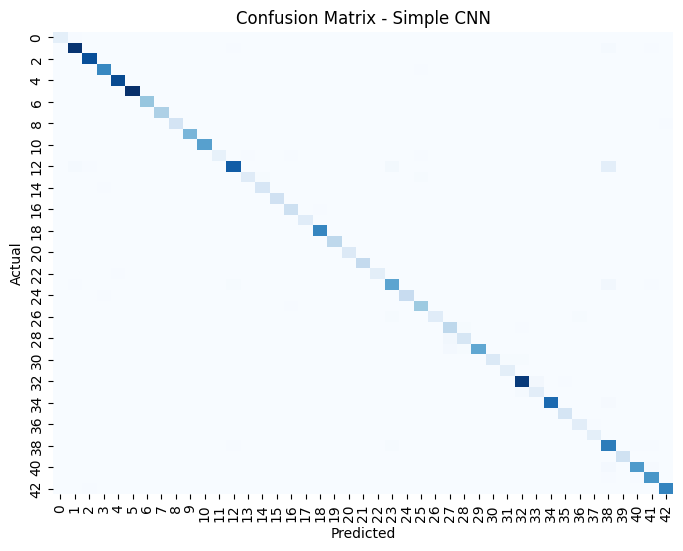

In [9]:
y_true = []
y_pred = []
for imgs, labels in val_ds:
    preds = simple_cnn.predict(imgs, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())
y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\nSimple CNN - classification report")
print(classification_report(y_true, y_pred, zero_division=0))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Simple CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def build_mobilenet(input_shape, n_classes, train_base=False):
    inputs = keras.Input(shape=input_shape)
    x = layers.Lambda(preprocess_input)(inputs)
    x = aug(x)
    base = MobileNetV2(weights="imagenet", include_top=False, input_shape=input_shape)
    base.trainable = train_base
    x = base(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(1e-3),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

mobilenet = build_mobilenet(IMG_SIZE + (3,), num_classes, train_base=False)
history_m = mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3,
    verbose=1
)



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/3
491/491 ━━━━━━━━━━━━━━━━━━━━ 265s 523ms/step - accuracy: 0.4596 - loss: 1.9257 - val_accuracy: 0.8063 - val_loss: 0.6401
Epoch 2/3
491/491 ━━━━━━━━━━━━━━━━━━━━ 253s 515ms/step - accuracy: 0.7613 - loss: 0.7282 - val_accuracy: 0.8546 - val_loss: 0.4578
Epoch 3/3
491/491 ━━━━━━━━━━━━━━━━━━━━ 251s 512ms/step - accuracy: 0.8173 - loss: 0.5613 - val_accuracy: 0.8693 - val_loss: 0.4050



MobileNetV2 - classification report
              precision    recall  f1-score   support

           0       0.97      0.73      0.83        44
           1       0.81      0.80      0.80       448
           2       0.93      0.89      0.91       390
           3       0.97      0.79      0.87       297
           4       1.00      0.98      0.99       396
           5       0.99      1.00      0.99       441
           6       1.00      1.00      1.00       173
           7       0.99      0.97      0.98       146
           8       1.00      0.91      0.96        82
           9       1.00      1.00      1.00       206
          10       0.93      0.92      0.93       248
          11       0.95      0.87      0.91        46
          12       0.77      0.73      0.75       429
          13       0.74      0.90      0.81        67
          14       0.79      0.91      0.84        75
          15       0.84      0.94      0.89        89
          16       0.86      0.79      0.82 

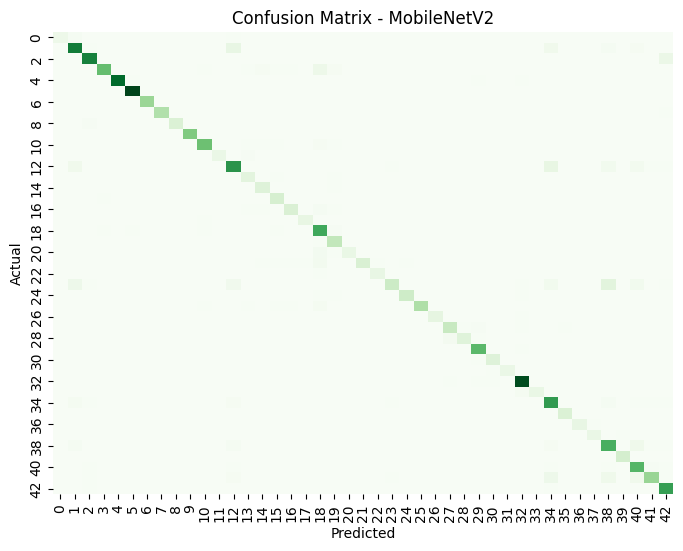

In [11]:
y_true_m = []
y_pred_m = []
for imgs, labels in val_ds:
    preds = mobilenet.predict(imgs, verbose=0)
    y_pred_m.extend(np.argmax(preds, axis=1))
    y_true_m.extend(labels.numpy())
y_true_m = np.array(y_true_m)
y_pred_m = np.array(y_pred_m)

print("\nMobileNetV2 - classification report")
print(classification_report(y_true_m, y_pred_m, zero_division=0))

cm2 = confusion_matrix(y_true_m, y_pred_m)
plt.figure(figsize=(8,6))
sns.heatmap(cm2, cmap="Greens", cbar=False)
plt.title("Confusion Matrix - MobileNetV2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
